<a href="https://colab.research.google.com/github/dileep-rawat/Capstone_Project_2--Bike_sharing_demand_prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Bike Sharing Demand Prediction </u></b>

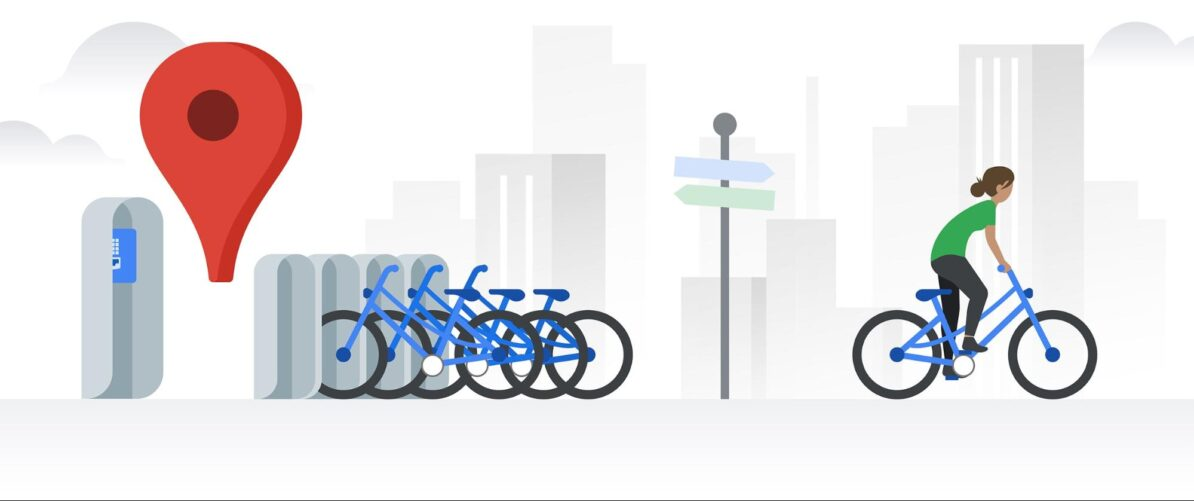

**Project Type**    - Regression

**Contribution**    - Individual

**Index:**

1. Problem statement
2. Importing Essential Libraries
3. Mounting drive
4. Data Exploration
5. Preprocessing & Data Cleaning
6. Exploratory Data Analysis
7. Feature engineering
8. ML model implementation
9. XG Boost model explainability using Shapley values
10. Results
11. Summary and conclusions
12. References

## <b> 1. Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


# **2. Importing Essential Libraries:-**

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

from prettytable import PrettyTable

%matplotlib inline
sns.set()

#**3. Mounting drive:-**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## csv file location and reading csv file:-

In [4]:
#reading csv file
path = '/content/drive/MyDrive/Almabetter/Capstone Project/Bike Sharing Demand Prediction/SeoulBikeData.csv'

bike_df = pd.read_csv(path,encoding='unicode_escape')

#**4. Data Exploration:-**

In [5]:
#checking the shape ( rows and column numbers)
bike_df.shape

(8760, 14)

In [6]:
# First 5 rows of the dataset
bike_df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
# Checking last 5 rows
bike_df.tail(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [8]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## <b> 4.1. Data Description </b>

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

* **Date** - year-month-day
* **Rented Bike count** - Count of bikes rented at each hour
* **Hour** - Hour of the day
* **Temperature** - Temperature in Celsius
* **Humidity** - %
* **Windspeed** - m/s
* **Visibility** - 10m
* **Dew point temperature** - Celsius
* **Solar radiation** - MJ/m2
* **Rainfall** - mm
* **Snowfall** - cm
* **Seasons** - Winter, Spring, Summer, Autumn
* **Holiday** - Holiday/No holiday
* **Functional Day** - NoFunc(Non Functional Hours), Fun(Functional hours)

# **5. Pre-processing & Data Cleaning:**

### Data cleaning is done in the following steps:-  
1) Remove duplicate rows  
2) Handling missing values.  
3) Convert columns to appropriate datatypes.  
4) Adding new features and renaming the features

### **Step-1: Remove duplicate rows:**

In [9]:
# checking duplicates
len(bike_df[bike_df.duplicated()])

0

There were no duplicate values

### **Step-2: Handling missing values:**

In [10]:
# checking null values
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Above result says that there are no null values in the data

### **Step-3: Convert columns to appropriate datatypes:**

In [11]:
# converting date column dtype object to date 
bike_df['Date']=pd.to_datetime(bike_df['Date'])

In [12]:
# Days between which the data is collected
print('Start date: ',bike_df['Date'].min())
print('End date: ',bike_df['Date'].max())

Start date:  2017-01-12 00:00:00
End date:  2018-12-11 00:00:00


* **The dataset is from a rental bike company based out of Seoul. The goal of this project is to develop a machine learning model that can predict the demand for rental bikes.**
* **The dataset contains the hourly weather conditions for a period of 364 days, and other details such as whether a said day was a holiday or not.**
* **The dataset containes a total of 8870 records and 14 attributes. There are no duplicate records or missing values in the dataset.**

### **Step-4: Adding new features and renaming the features:**

In [13]:
# renaming the features
bike_df.rename(columns= {'Date':'date','Rented Bike Count': 'rented_bike_count', 'Hour':'hour',
                    'Temperature(°C)':'temperature', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility',
                    'Dew point temperature(°C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall',
                    'Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_day'},
          inplace=True)

 Engineering new features 'month' and 'day_of_week' from the 'date':

In [14]:
# creating a new featrue
bike_df['month']= bike_df['date'].dt.month
bike_df['day_of_week']= bike_df['date'].dt.dayofweek

# {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

 Engineering new feature 'weekend':

* In a city, it is highly likely that the rental bike demand may follow different pattern over the weekends when people do not generally go to work.
* To capture this trend, we can define a new feature 'weekend' which indicates whether a said day is a weekend (1) or not (0).

In [15]:
# engineering new feature 'weekend' from day_of_week
bike_df['weekend'] = bike_df['day_of_week'].apply(lambda x: 1 if x>4 else 0)

# **6. Exploratory Data Analysis:**

In [16]:
# summary of numerical columns
bike_df.describe()

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,month,day_of_week,weekend
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,6.526027,3.021918,0.290411
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,3.448048,1.999994,0.453978
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,7.000000,3.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,10.000000,5.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,12.000000,6.000000,1.000000


## **6.1. Analyzing the distribution of the dependent variable:**

In [17]:
# defining dependent variable separately
dependent_variable = ['rented_bike_count']

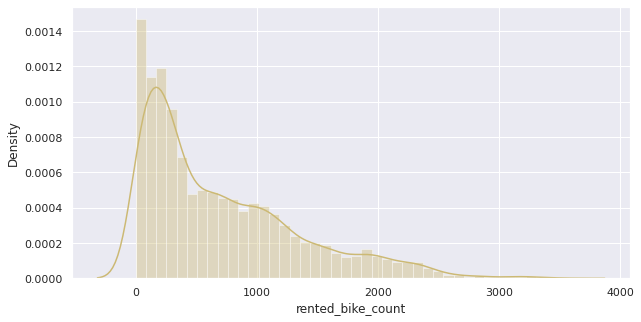

In [18]:
# visualizing the distribution of the dependent variable - rental bike count
plt.figure(figsize=(10,5))
sns.distplot(bike_df['rented_bike_count'],color="y") 

In [19]:
#skew of the dependant varaible
bike_df[dependent_variable].skew()

rented_bike_count    1.153428
dtype: float64

* **The dependent variable is positively skewed. To get better predictions, it is ideal if the dependent variable is almost normally distributed.**
* **To achieve this, we can transform the data by log, sqrt, etc.**

### **6.1.1. Log transformation:**

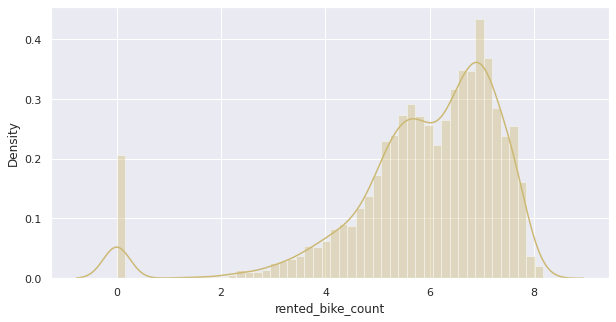

In [20]:
# visualizing the distribution of dependent variable after log transformation
plt.figure(figsize=(10,5))
sns.distplot(np.log1p(bike_df['rented_bike_count']),color="y") 

In [21]:
# skew of the dependent variable after log transformation
np.log1p(bike_df[dependent_variable]).skew()

rented_bike_count   -1.832199
dtype: float64

### **6.1.2. Square-root transformation:**

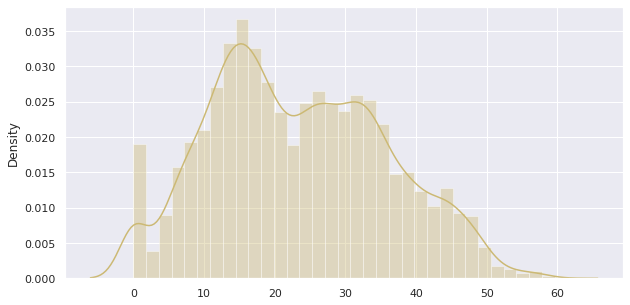

In [22]:
# visualizing the distribution of dependent variable after sqrt transformation
plt.figure(figsize=(10,5))
sns.distplot(np.sqrt(bike_df[dependent_variable]),color="y")

In [23]:
# skew of the dependent variable after sqrt transformation
np.sqrt(bike_df[dependent_variable]).skew()

rented_bike_count    0.237362
dtype: float64

**We were able to reduce skewness on square root transformation. Hence we can use square root transformation during the modelling.**

## **6.2. Analyzing the distribution of numeric independent variables:**

In [24]:
numeric_features = bike_df.describe().columns[1:]
numeric_features

Index(['hour', 'temperature', 'humidity', 'wind_speed', 'visibility',
       'dew_point_temp', 'solar_radiation', 'rainfall', 'snowfall', 'month',
       'day_of_week', 'weekend'],
      dtype='object')

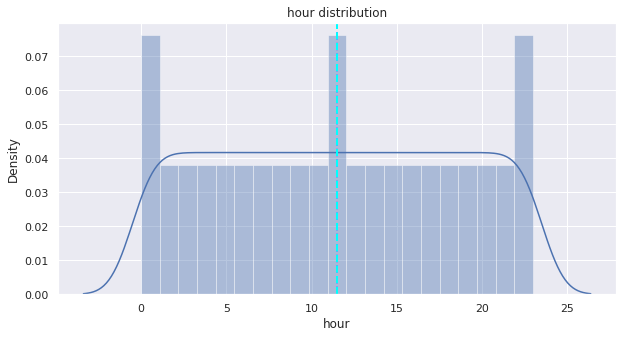

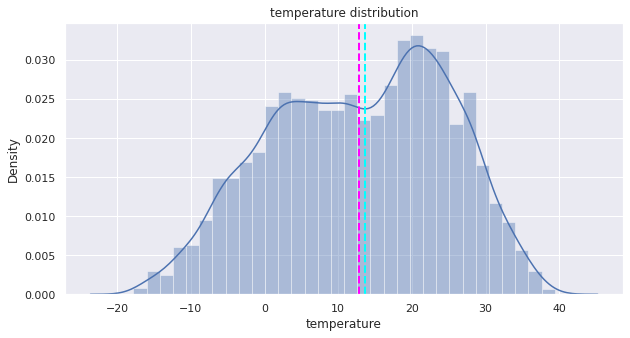

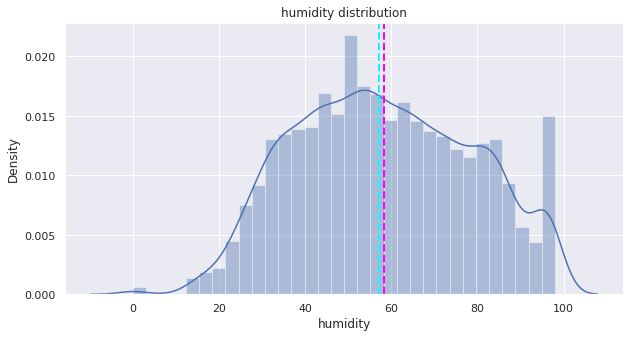

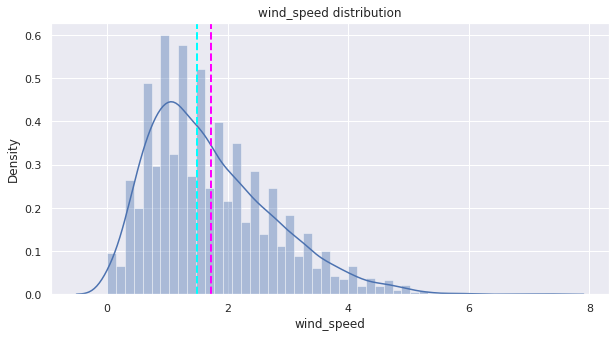

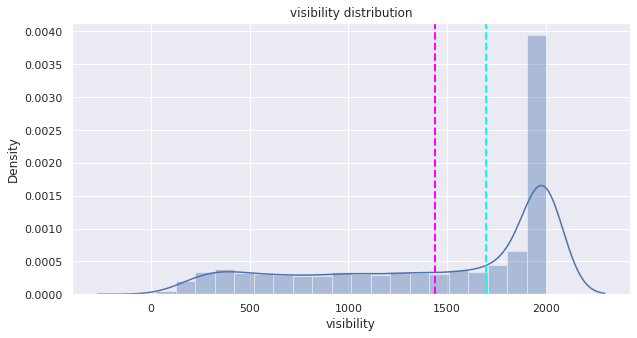

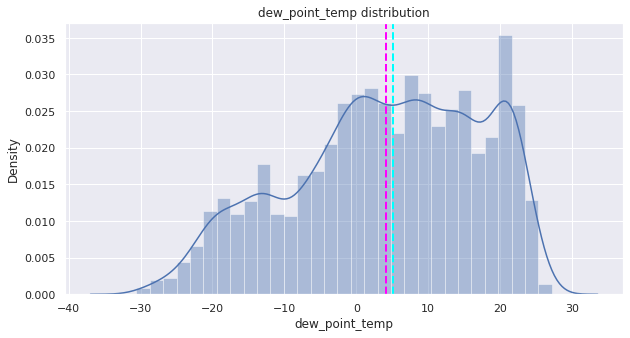

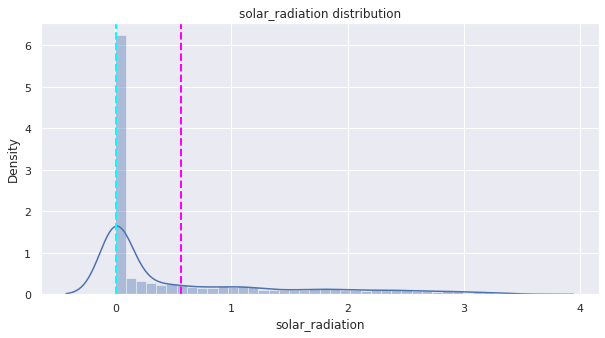

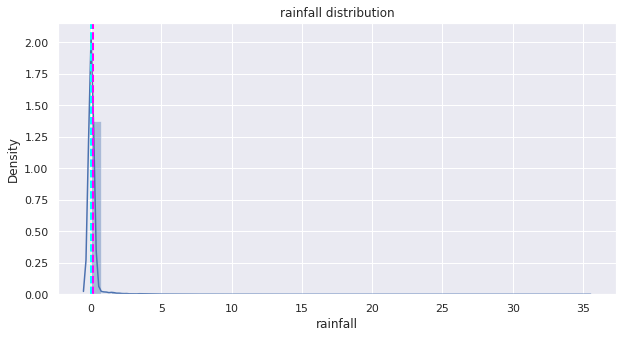

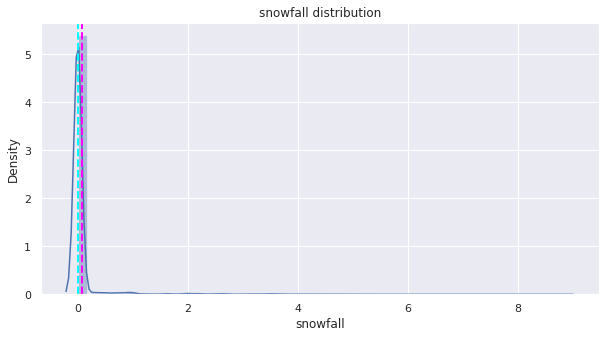

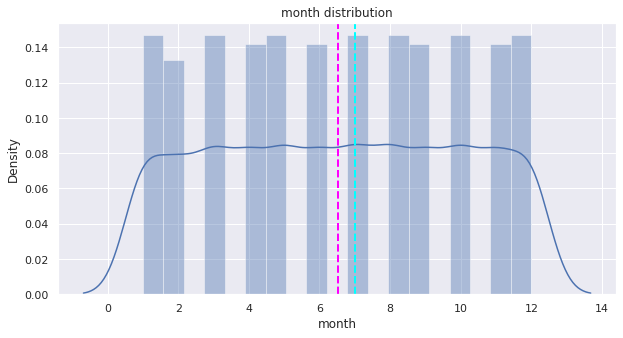

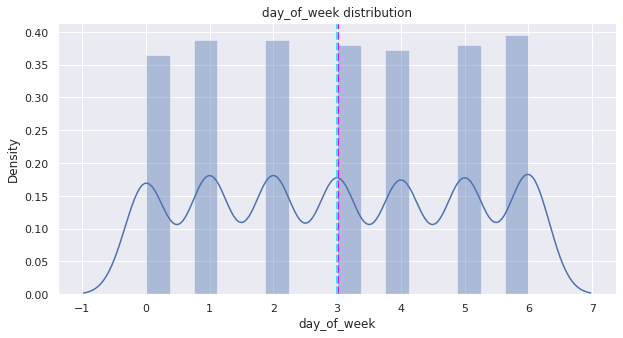

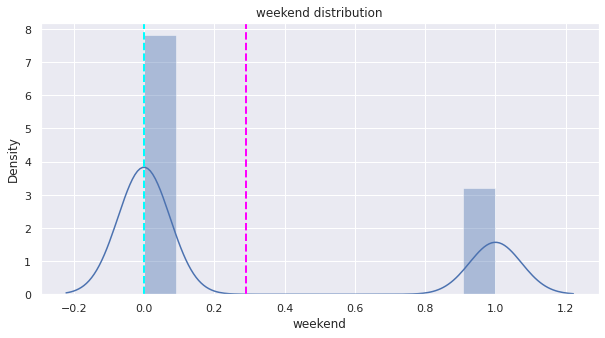

In [25]:
# Analyzing the distribution of the numeric independent variables
for col in numeric_features:
  plt.figure(figsize=(10,5))
  sns.distplot(bike_df[col])
  plt.axvline(bike_df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(bike_df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

**Summary:**

* **Normally distributed attributes: temperature, humidity,Dew point temperature(°C).**
* **Positively skewed attributes: wind, solar_radiation, snowfall, rainfall.**
* **Negatively skewed attributes: visibility.**
* **Here weekend, day_of_week, month,snowfall,rainfall and hour is a categorical variable. So we will separate those variables.**

In [26]:
#Updating the numeric features
numeric_features= ['temperature', 'humidity', 'wind_speed', 'visibility','dew_point_temp',
       'solar_radiation']

## **6.3. Analyzing the correlation amoung features:**

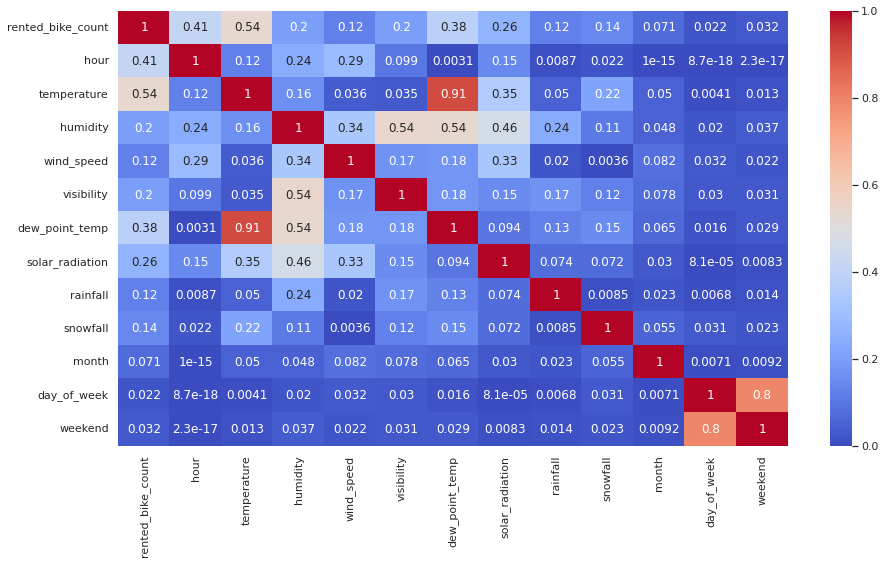

In [27]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = bike_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

There is high correlation between temperature and dew_point_temp and between day_of_week and weekend.

In [28]:
# dropping dew point temperature
bike_df.drop('dew_point_temp', axis=1,inplace=True)

In [29]:
# After dropping final numeric features
numerical_features= ['temperature', 'humidity', 'wind_speed', 'visibility',
       'solar_radiation', 'rainfall', 'snowfall']

A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. Multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model. 

In [30]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [31]:
# caculating VIF
calc_vif(bike_df[[i for i in numerical_features]])

,variables,VIF
0,temperature,3.166007
1,humidity,4.758651
2,wind_speed,4.079926
3,visibility,4.409448
4,solar_radiation,2.246238
5,rainfall,1.078501
6,snowfall,1.118901


**There is no multicollinerity in the data.**

## **6.4. Analyzing the relationship between dependent variable and categorical independent variables:**

In [32]:
# defining categorical independent variables separately
categorical_var = ['hour','seasons', 'holiday', 'func_day', 'month', 'day_of_week', 'weekend']

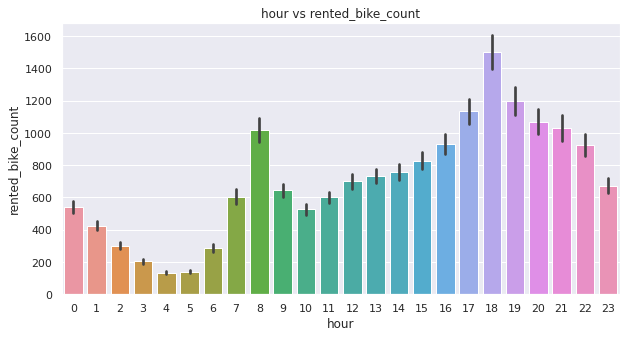

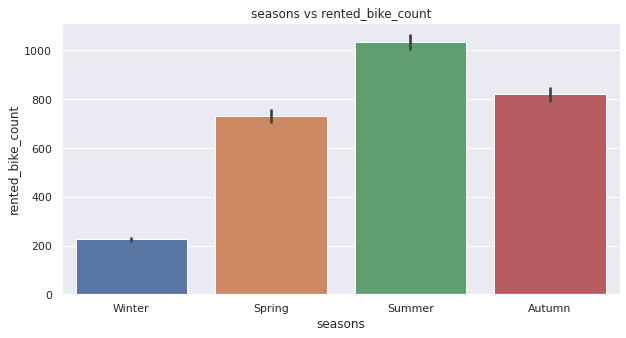

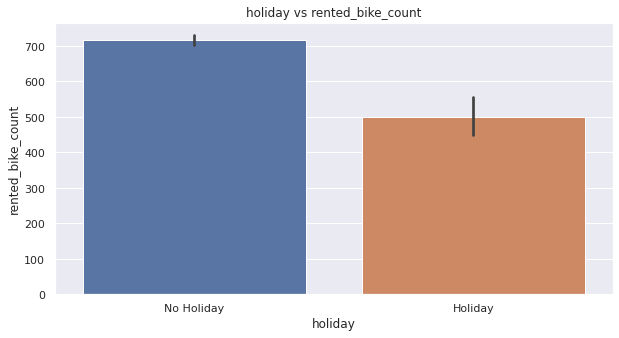

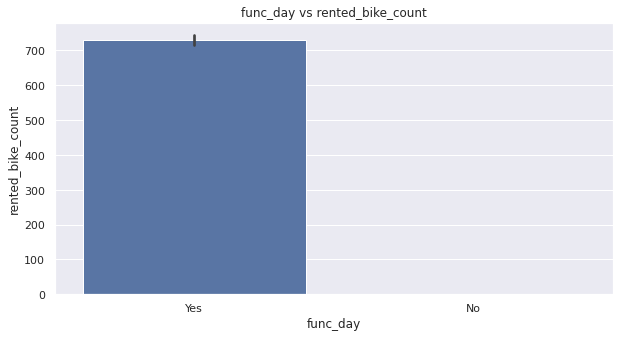

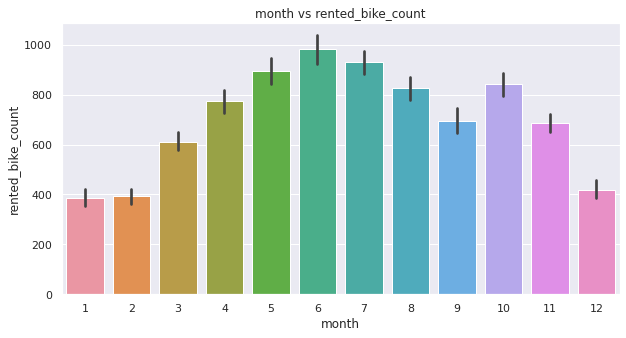

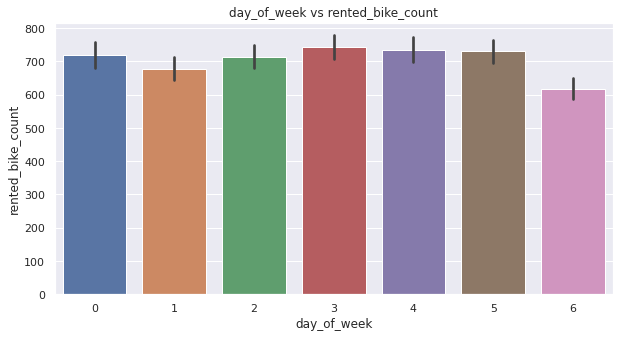

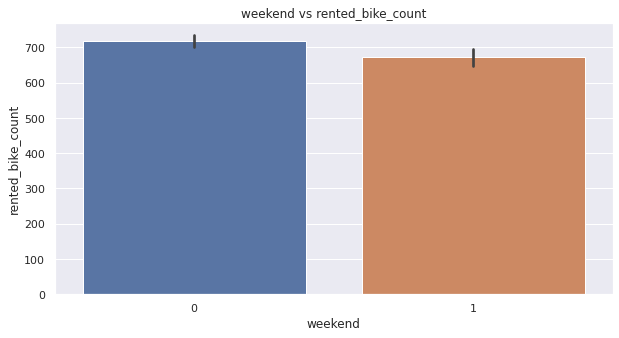

In [33]:
# Analyzing the relationship between the dependent variable and the categorical variables
for i in categorical_var:
    plt.figure(figsize=(10,5))
    sns.barplot(data=bike_df, x=i, y=dependent_variable[0])
    plt.xlabel(i)
    plt.ylabel(dependent_variable[0])
    plt.title(i+' vs '+ dependent_variable[0])


**Summary:**

* **The number of bikes rented is higher during the rush hours.**
* **The rented bike counts is higher during the summer and lowest during the winter.**
* **The rented bike count is higher on working days than on non working days.**
* **On a non functioning day, no bikes are rented in all the instances of the data.**
* **The number of bikes rented on average remains constant throughout Monday - Saturday, it dips on Sunday.**
* **The rented bike counts is slightly lower on weekends than on weekdays.**


## We will try to visulize the weekend column

Text(0.5, 1.0, 'Rented Bike Count during weekday and weekend with respect of Hour')

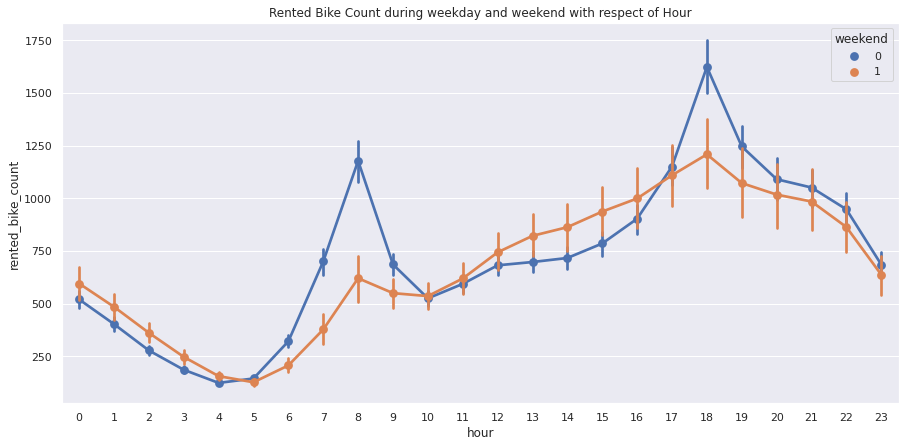

In [34]:
# Getting pattern of week column with pointplot  
plt.figure(figsize=(15,7))
sns.pointplot(x=bike_df["hour"],y=bike_df['rented_bike_count'],hue=bike_df['weekend'])
plt.title("Rented Bike Count during weekday and weekend with respect of Hour")

We can clearly see the pattern which shows that the demand is high in the afternoon on the weekend. While there is more demand during office hours in weekdays

## **6.5. Outlier analysis:**

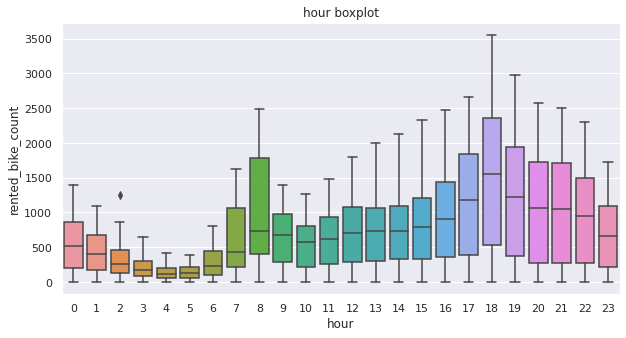

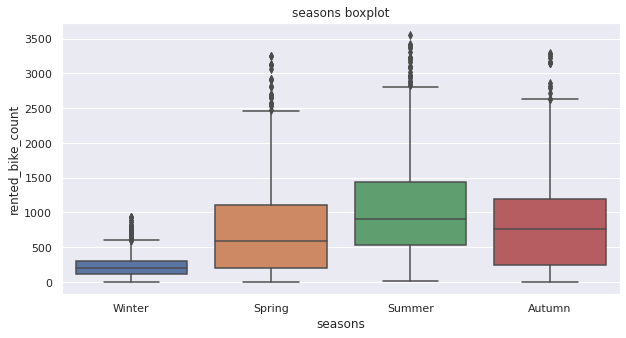

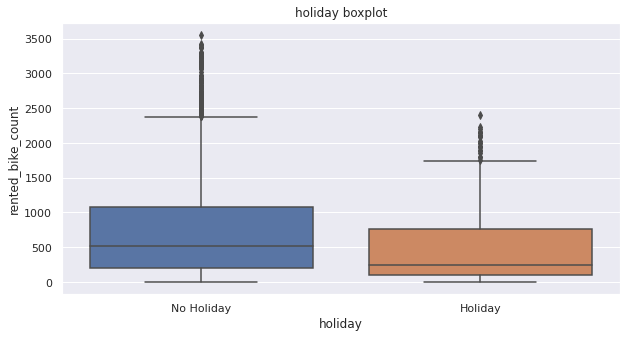

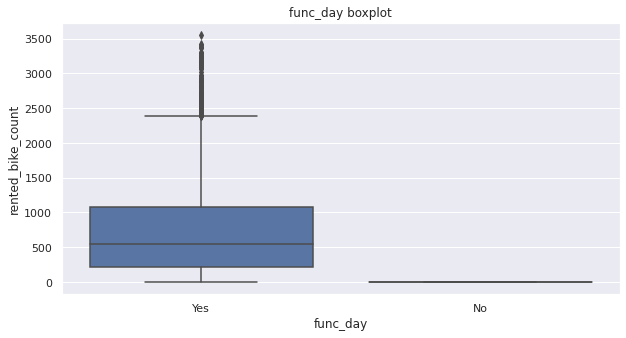

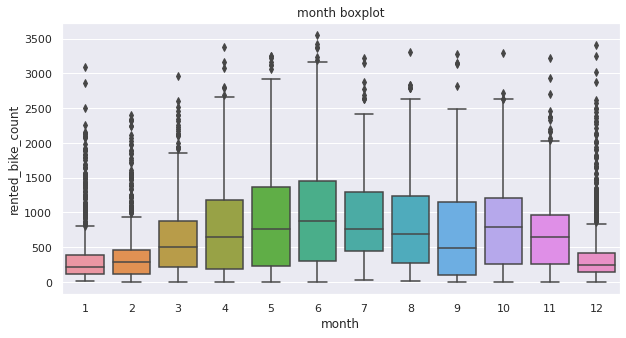

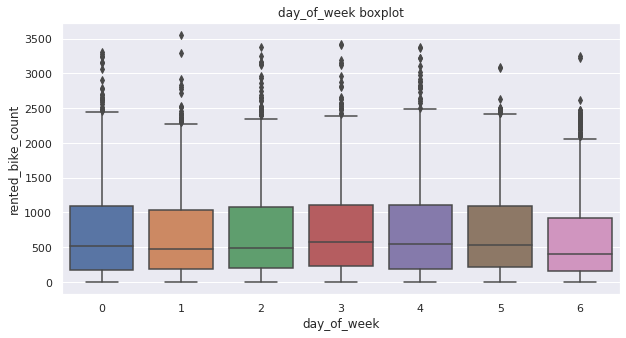

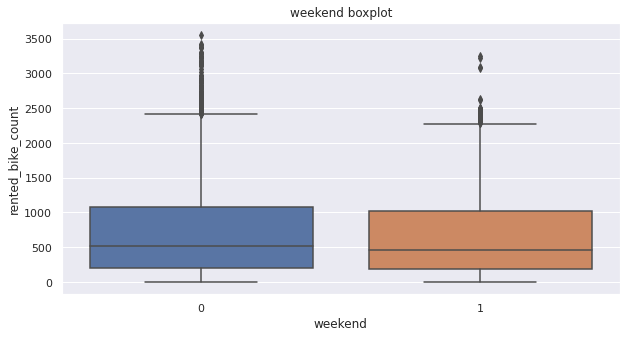

In [35]:
# Getting outliers
for col in categorical_var:
  plt.figure(figsize=(10,5))
  sns.boxplot(x = col,y = dependent_variable[0],data=bike_df)
  plt.title(col+' boxplot')
  plt.show()

**There are outliers in the data and this must be taken into consideration in the model building phase.**

# **7. Feature engineering:**

In [36]:
# features
bike_df.columns

Index(['date', 'rented_bike_count', 'hour', 'temperature', 'humidity',
       'wind_speed', 'visibility', 'solar_radiation', 'rainfall', 'snowfall',
       'seasons', 'holiday', 'func_day', 'month', 'day_of_week', 'weekend'],
      dtype='object')

##**7.1. Converting snowfall, rainfall and visibility to categorical attributes:**

* Since there are vary few day on which there was snowfall / rainfall, it is in our interest that we convert these columns to binary categorical columns indicating whether there was rainfall / snowfall at that particular hour

In [37]:
# Converting snowfall and rainfall to categorical attributes
bike_df['snowfall'] = bike_df['snowfall'].apply(lambda x: 1 if x>0 else 0)
bike_df['rainfall'] = bike_df['rainfall'].apply(lambda x: 1 if x>0 else 0)

**Converting visibility to a categorical attribute:**

When
* Visibility >= 20 Km ---> Clear (high visibility)
* 4 Km <= Visibility < 10 Km ---> Haze (medium visibility)
* Visibility < 4 Km ---> Fog (low visibility)

In [38]:
# encoding the visibility column
bike_df['visibility'] = pd.cut(bike_df.visibility,bins=[0,399,999,2001],labels=[0,1,2])

In [39]:
# encoding
bike_df['func_day'] = np.where(bike_df['func_day'] == 'Yes',1,0)
bike_df['holiday'] = np.where(bike_df['holiday'] == 'Holiday', 1,0)

## **7.2. One-hot encoding:**

* Nominal categorical features 'month', 'day_of_week', 'hour' are nominal categorical variables. Hence we need to encode them.

In [40]:
bike_df= pd.get_dummies(bike_df,columns = ['month', 'hour','day_of_week'])

In [41]:
# dropping seasons,date and weekend
bike_df.drop(['seasons','weekend','date'],axis=1, inplace=True)

In [44]:
# exploring head
bike_df.head()

,rented_bike_count,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,holiday,func_day,...,hour_21,hour_22,hour_23,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,254,-5.2,37,2.2,2,0.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,204,-5.5,38,0.8,2,0.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,173,-6.0,39,1.0,2,0.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,107,-6.2,40,0.9,2,0.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,78,-6.0,36,2.3,2,0.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [45]:
# exploring column
bike_df.columns

Index(['rented_bike_count', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'solar_radiation', 'rainfall', 'snowfall', 'holiday',
       'func_day', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'day_of_week_0',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6'],
      dtype='object')

In [46]:
#defining final features
features = numerical_features.copy()
features.extend(['holiday','func_day', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'day_of_week_0',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6'])

In [48]:
# total features
len(features)

52

# **8. ML Model Implementation:**

In [49]:
# Defining dependent and independent variables
X = bike_df[features]
y = np.sqrt(bike_df[dependent_variable])

In [50]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

## **8.1. Linear regression model:**

In [51]:
# FittingLinear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [52]:
# Getting socre
regressor.score(X_train,y_train)

0.7730491388987327

In [53]:
# Predictions on train data
lr_y_train_pred = regressor.predict(X_train)

In [54]:
# Gettting MSE,RMSE and R2 
lr_train_MSE  = mean_squared_error(np.square(y_train), np.square(lr_y_train_pred))
print("lr_train_MSE :" , lr_train_MSE)

lr_train_RMSE = np.sqrt(lr_train_MSE)
print("lr_train_RMSE :" ,lr_train_RMSE)

lr_train_r2 = r2_score(np.square(y_train), np.square(lr_y_train_pred))     
print("lr_train_r2 :" ,lr_train_r2)
print("Adjusted R2 : ",1-(1-r2_score(np.square(y_train), np.square(lr_y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

lr_train_MSE : 113328.82799248643
lr_train_RMSE : 336.6434731173121
lr_train_r2 : 0.7270783075000147
Adjusted R2 :  0.7250377714813232


In [55]:
# Predicting the Test set results
lr_y_test_pred = regressor.predict(X_test)

In [56]:
# Gettting MSE,RMSE and R2 
LR_test_MSE  = mean_squared_error(np.square(y_test), np.square(lr_y_test_pred))
print("LR_test_MSE :" , LR_test_MSE)

LR_test_RMSE = np.sqrt(LR_test_MSE)
print("LR_test_RMSE :" ,LR_test_RMSE)

LR_test_r2 = r2_score(np.square(y_test), np.square(lr_y_test_pred))     
print("LR_test_r2 :" ,LR_test_r2)
print("LR_Adjusted_R2 : ",1-(1-r2_score(np.square(y_test), np.square(lr_y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

LR_test_MSE : 115331.24896857968
LR_test_RMSE : 339.60454792093066
LR_test_r2 : 0.7244324388929424
LR_Adjusted_R2 :  0.7159983522669465


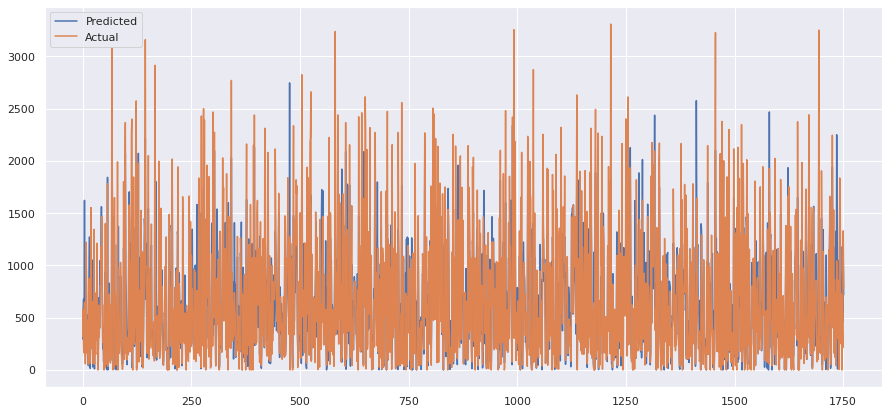

In [57]:
# Plot between actual target variable vs Predicted one
plt.figure(figsize=(15,7))
plt.plot(np.square(lr_y_test_pred))
plt.plot(np.array(np.square(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## **8.2. Lasso regression model:**

In [58]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [59]:
# Printing best parameter
print(f'The best fit alpha value is found to be :{lasso_regressor.best_params_}')
print(f'The negative mean squared error using {lasso_regressor.best_params_} is {lasso_regressor.best_score_}')

The best fit alpha value is found to be :{'alpha': 0.0001}
The negative mean squared error using {'alpha': 0.0001} is -35.683296423705556


In [60]:
# Predictions on train data
las_y_train_pred = lasso_regressor.predict(X_train)

In [61]:
# Gettting MSE,RMSE and R2 for train dataset
las_train_MSE  = mean_squared_error(np.square(y_train), np.square(las_y_train_pred))
print("las_test_MSE :" , las_train_MSE)

las_train_RMSE = np.sqrt(las_train_MSE)
print("las_test_RMSE :" ,las_train_RMSE)

las_train_r2 = r2_score(np.square(y_train), np.square(las_y_train_pred))    
print("las_test_r2 :" ,las_train_r2)
print("Las_test_Adjusted_R2 :",1-(1-r2_score(np.square(y_train), np.square(las_y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

las_test_MSE : 113350.61670988706
las_test_RMSE : 336.67583327272996
las_test_r2 : 0.7270258352938186
Las_test_Adjusted_R2 : 0.7249849069595667


In [62]:
# Predictions on test data
lasso_y_test_pred = lasso_regressor.predict(X_test)

In [63]:
# Gettting MSE,RMSE and R2 for test dataset
las_test_MSE  = mean_squared_error(np.square(y_test), np.square(lasso_y_test_pred))
print("las_test_MSE :" , las_test_MSE)

las_test_RMSE = np.sqrt(las_test_MSE)
print("las_test_RMSE :" ,las_test_RMSE)

las_test_r2 = r2_score(np.square(y_test), np.square(lasso_y_test_pred))    
print("las_test_r2 :" ,las_test_r2)
print("Las_test_Adjusted_R2 :",1-(1-r2_score(np.square(y_test), np.square(lasso_y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

las_test_MSE : 115351.65761721066
las_test_RMSE : 339.63459425861004
las_test_r2 : 0.7243836753394475
Las_test_Adjusted_R2 : 0.7159480962444806


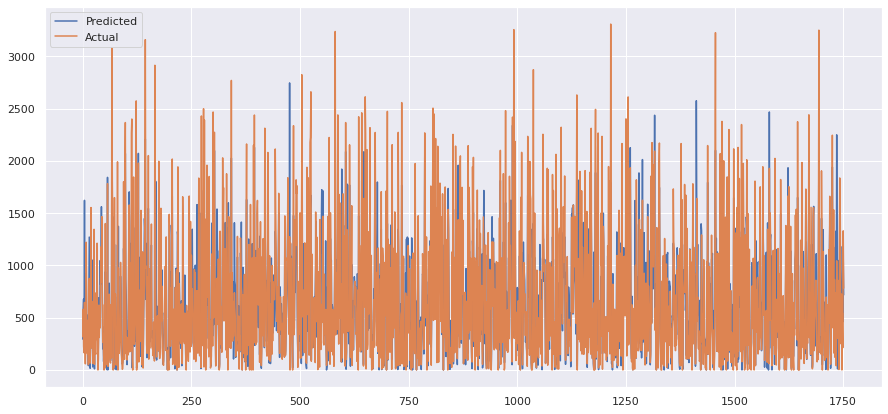

In [64]:
# Plot between actual target variable vs Predicted one
plt.figure(figsize=(15,7))
plt.plot(np.square(lasso_y_test_pred))
plt.plot(np.square(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## **8.3. Ridge regression model:**

In [65]:
### Cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [66]:
# Printing best parameter
print(f'The best fit alpha value is found to be :{ridge_regressor.best_params_}')
print(f'The negative mean squared error using {ridge_regressor.best_params_} is {ridge_regressor.best_score_}')

The best fit alpha value is found to be :{'alpha': 1}
The negative mean squared error using {'alpha': 1} is -35.7060441912325


In [67]:
# Predictions on train data
y_train_pred_ridge = ridge_regressor.predict(X_train) 

In [68]:
# Gettting MSE,RMSE and R2 for train dataset
ridge_train_MSE  = mean_squared_error(np.square(y_train), np.square(y_train_pred_ridge))
print("ridge_train_MSE :" , ridge_train_MSE)

ridge_train_RMSE = np.sqrt(ridge_train_MSE)
print("ridge_train_RMSE :" ,ridge_train_RMSE)

ridge_train_r2 = r2_score(np.square(y_train), np.square(y_train_pred_ridge))    
print("ridge_train_r2 :" ,ridge_train_r2)
print("ridhe_train_Adjusted_R2 : ",1-(1-r2_score(np.square(y_train), np.square(y_train_pred_ridge)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_test.shape[1]-1)))

ridge_train_MSE : 113545.35758076918
ridge_train_RMSE : 336.96492040087674
ridge_train_r2 : 0.7265568548144334
ridhe_train_Adjusted_R2 :  0.724512420084074


In [69]:
# Predictions on test data
y_test_pred_ridge= ridge_regressor.predict(X_test)

In [70]:
# Gettting MSE,RMSE and R2 for test dataset
ridge_test_MSE  = mean_squared_error(np.square(y_test), np.square(y_test_pred_ridge))
print("ridge_test_MSE :" , ridge_test_MSE)

ridge_test_RMSE = np.sqrt(ridge_test_MSE)
print("ridge_test_RMSE :" ,ridge_test_RMSE)

ridge_test_r2 = r2_score(np.square(y_test), np.square(y_test_pred_ridge))    
print("ridge_test_r2 :" ,ridge_test_r2)
print("ridhe_test_Adjusted_R2 : ",1-(1-r2_score(np.square(y_test), np.square(y_test_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

ridge_test_MSE : 115523.47828733054
ridge_test_RMSE : 339.88744944073846
ridge_test_r2 : 0.7239731343678013
ridhe_test_Adjusted_R2 :  0.7155249901577517


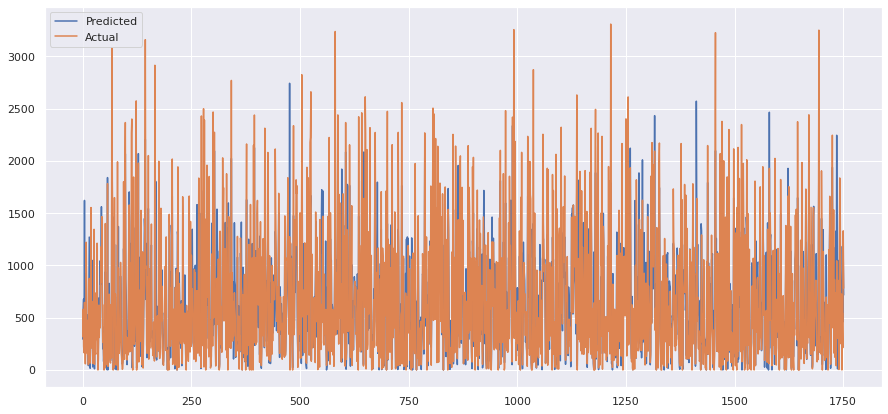

In [71]:
# Plot between actual target variable vs Predicted one
plt.figure(figsize=(15,7))
plt.plot(np.square(y_test_pred_ridge))
plt.plot(np.square(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## **8.4. Decision tree:**

In [72]:
# Using gridsearchcv to find the hyperparameters with best predictions
decisionTree = DecisionTreeRegressor(random_state=0)
parameters = {'max_depth':np.arange(20,26),
             'min_samples_leaf':np.arange(30,41,2)
             }

In [73]:
# Fitting the model
dt_regressor= GridSearchCV(decisionTree, parameters, scoring='neg_mean_squared_error', cv=6)
dt_regressor.fit(X_train,y_train)

GridSearchCV(cv=6, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': array([20, 21, 22, 23, 24, 25]),
                         'min_samples_leaf': array([30, 32, 34, 36, 38, 40])},
             scoring='neg_mean_squared_error')

In [74]:
# model best parameters
print(f'The best fit is found to be {dt_regressor.best_params_}')

The best fit is found to be {'max_depth': 25, 'min_samples_leaf': 30}


In [75]:
# Predictions on train data
dt_y_train_pred= dt_regressor.predict(X_train)

In [76]:
# Gettting MSE,RMSE and R2 for train dataset
dt_train_MSE  = mean_squared_error(np.square(y_train), np.square(dt_y_train_pred))
print("dt_train_MSE :" , dt_train_MSE)

dt_train_RMSE = np.sqrt(dt_train_MSE)
print("dt_train_RMSE :" ,dt_train_RMSE)

dt_train_r2 = r2_score(np.square(y_train), np.square(dt_y_train_pred))    
print("dt_train_r2 :" ,dt_train_r2)
print("dt_train_Adjusted_R2 : ",1-(1-r2_score(np.square(y_train), np.square(dt_y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

dt_train_MSE : 71006.20844455207
dt_train_RMSE : 266.46990157342736
dt_train_r2 : 0.8290008382688056
dt_train_Adjusted_R2 :  0.8277223398633387


In [77]:
# building Dicision tree model with best parameters
dt_y_test_pred= dt_regressor.predict(X_test)

In [78]:
# Gettting MSE,RMSE and R2 for test dataset
dt_test_MSE  = mean_squared_error(np.square(y_test), np.square(dt_y_test_pred))
print("dt_test_MSE :" , dt_test_MSE)

dt_test_RMSE = np.sqrt(dt_test_MSE)
print("dt_test_RMSE :" ,dt_test_RMSE)

dt_test_r2 = r2_score(np.square(y_test), np.square(dt_y_test_pred))    
print("dt_test_r2 :" ,dt_test_r2)
print("dt_test_Adjusted_R2 : ",1-(1-r2_score(np.square(y_test), np.square(dt_y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

dt_test_MSE : 92606.98914274057
dt_test_RMSE : 304.3139647514398
dt_test_r2 : 0.7787288148896646
dt_test_Adjusted_R2 :  0.7719565361223089


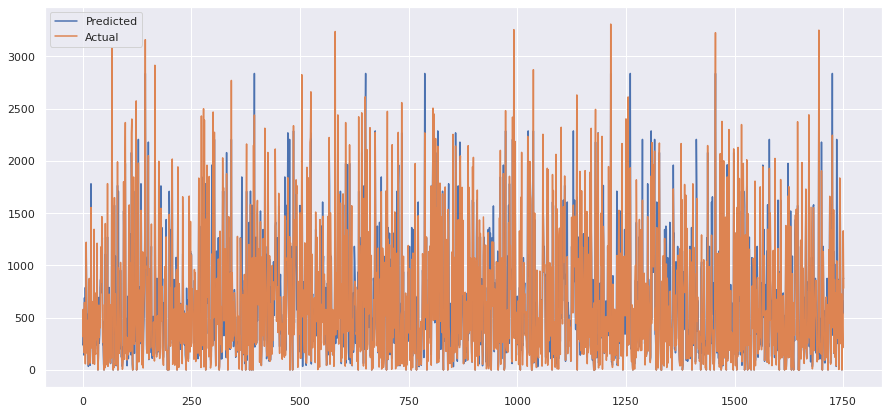

In [79]:
# Plot between actual target variable vs Predicted one
plt.figure(figsize=(15,7))
plt.plot(np.square(dt_y_test_pred))
plt.plot(np.square(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## **8.5. Random Forests:**

In [80]:
# random forest model
randomForest = RandomForestRegressor(random_state=0)
parameters = {'n_estimators':[500],
             'min_samples_leaf':np.arange(25,31)
             }

In [81]:
# Fitting the model
rf_regressor= GridSearchCV(randomForest, parameters, scoring='neg_mean_squared_error', cv=6)
rf_regressor.fit(X_train,y_train)

GridSearchCV(cv=6, estimator=RandomForestRegressor(random_state=0),
             param_grid={'min_samples_leaf': array([25, 26, 27, 28, 29, 30]),
                         'n_estimators': [500]},
             scoring='neg_mean_squared_error')

In [82]:
# model best parameters
print(f'The best fit is found to be {rf_regressor.best_params_}')

The best fit is found to be {'min_samples_leaf': 25, 'n_estimators': 500}


In [83]:
# Predictions on train data
rf_y_train_pred= rf_regressor.predict(X_train)

In [84]:
# Gettting MSE,RMSE and R2 for train dataset
rf_train_MSE  = mean_squared_error(np.square(y_train), np.square(rf_y_train_pred))
print("rf_train_MSE :" , rf_train_MSE)

rf_train_RMSE = np.sqrt(rf_train_MSE)
print("rf_train_RMSE :" ,rf_train_RMSE)

rf_train_r2 = r2_score(np.square(y_train), np.square(rf_y_train_pred))    
print("rf_train_r2 :" ,rf_train_r2)
print("rf_train_Adjusted_R2 : ",1-(1-r2_score(np.square(y_train), np.square(rf_y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

rf_train_MSE : 67469.02918674356
rf_train_RMSE : 259.74801093895513
rf_train_r2 : 0.8375191735133997
rf_train_Adjusted_R2 :  0.8363043635957428


In [85]:
# building  random forest model with best parameters
rf_y_test_pred= rf_regressor.predict(X_test)

In [86]:
# Gettting MSE,RMSE and R2 for test dataset
rf_test_MSE  = mean_squared_error(np.square(y_test), np.square(rf_y_test_pred))
print("rf_test_MSE :" , rf_test_MSE)

rf_test_RMSE = np.sqrt(rf_test_MSE)
print("rf_test_RMSE :" ,rf_test_RMSE)

rf_test_r2 = r2_score(np.square(y_test), np.square(rf_y_test_pred))    
print("rf_test_r2 :" ,rf_test_r2)
print("rf_test_Adjusted_R2 : ",1-(1-r2_score(np.square(y_test), np.square(rf_y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

rf_test_MSE : 81096.37784955063
rf_test_RMSE : 284.77425770169367
rf_test_r2 : 0.8062317779572011
rf_test_Adjusted_R2 :  0.8003012614497111


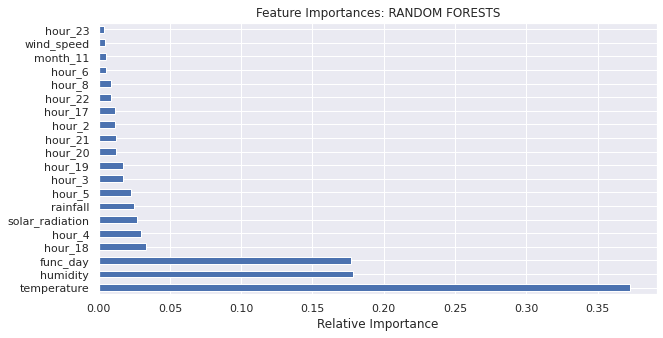

In [87]:
# Feature importances
rf_feat_imp = pd.Series(rf_regressor.best_estimator_.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: RANDOM FORESTS')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh')

**Temperature is the most important feature in predicting the value of the dependent variable for random forests, followed by humidity and func_day.**

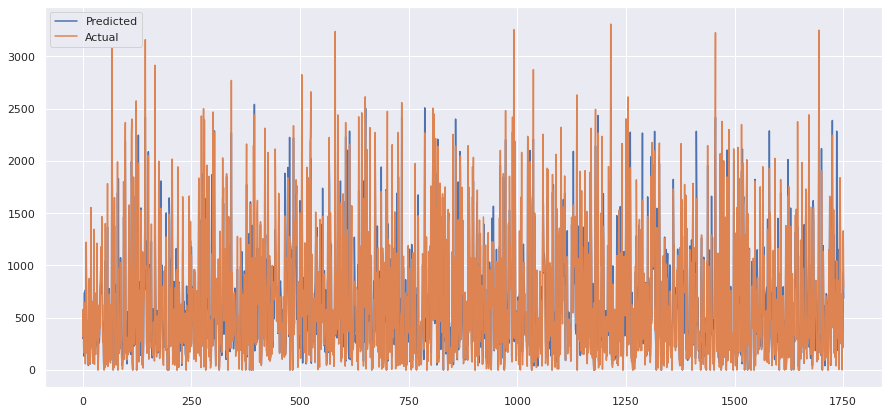

In [88]:
# Actual vs predicted values of dependent variables
plt.figure(figsize=(15,7))
plt.plot(np.square(rf_y_test_pred))
plt.plot(np.square(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## **8.6. Gradient Boosting:**

In [89]:
# Gradient Boosting model
GradientBoosting = GradientBoostingRegressor(random_state=0)
parameters = {'n_estimators':[500],
             'min_samples_leaf':np.arange(25,31)
             }

In [90]:
# Fitting the model
gb_regressor =GridSearchCV(GradientBoosting, parameters, scoring='neg_mean_squared_error', cv=6)
gb_regressor.fit(X_train,y_train)

GridSearchCV(cv=6, estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'min_samples_leaf': array([25, 26, 27, 28, 29, 30]),
                         'n_estimators': [500]},
             scoring='neg_mean_squared_error')

In [91]:
# model best parameters
print(f'The best fit is found to be {gb_regressor.best_params_}')

The best fit is found to be {'min_samples_leaf': 27, 'n_estimators': 500}


In [92]:
# Predictions on train data
gb_y_train_pred= gb_regressor.predict(X_train)

In [93]:
# Gettting MSE,RMSE and R2 for train dataset
gb_train_MSE  = mean_squared_error(np.square(y_train), np.square(gb_y_train_pred))
print("gb_train_MSE :" , gb_train_MSE)

gb_train_RMSE = np.sqrt(gb_train_MSE)
print("gb_train_RMSE :" ,gb_train_RMSE)

gb_train_r2 = r2_score(np.square(y_train), np.square(gb_y_train_pred))    
print("gb_train_r2 :" ,gb_train_r2)
print("gb_train_Adjusted_R2 : ",1-(1-r2_score(np.square(y_train), np.square(gb_y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

gb_train_MSE : 41307.47363994502
gb_train_RMSE : 203.24240118623138
gb_train_r2 : 0.9005221723508888
gb_train_Adjusted_R2 :  0.89977841289183


In [94]:
# building  GB model with best parameters
gb_y_test_pred= gb_regressor.predict(X_test)

In [95]:
# Gettting MSE,RMSE and R2 for test dataset
gb_test_MSE  = mean_squared_error(np.square(y_test), np.square(gb_y_test_pred))
print("gb_test_MSE :" , gb_test_MSE)

gb_test_RMSE = np.sqrt(gb_test_MSE)
print("gb_test_RMSE :" ,gb_test_RMSE)

gb_test_r2 = r2_score(np.square(y_test), np.square(gb_y_test_pred))    
print("gb_test_r2 :" ,gb_test_r2)
print("gb_test_Adjusted_R2 : ",1-(1-r2_score(np.square(y_test), np.square(gb_y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

gb_test_MSE : 54826.65222578407
gb_test_RMSE : 234.15091762746536
gb_test_r2 : 0.8689995385236813
gb_test_Adjusted_R2 :  0.8649901070953302


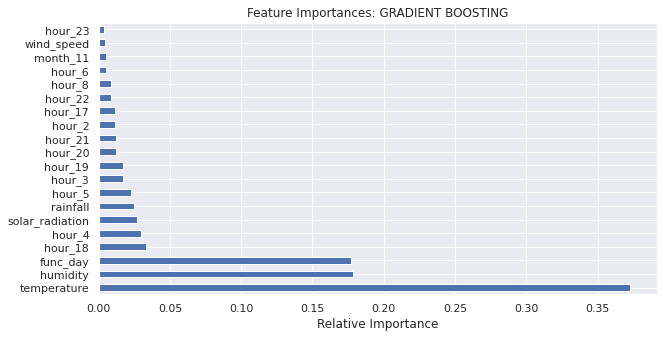

In [96]:
# Feature importances
gb_feat_imp = pd.Series(gb_regressor.best_estimator_.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: GRADIENT BOOSTING')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh')

**Temperature is the most important feature in predicting the value of the dependent variable using gradient boosting, followed by func_day and humidity.**

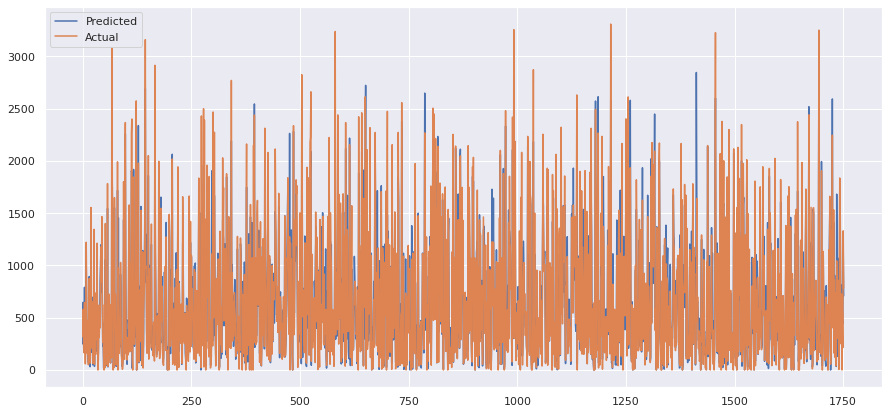

In [97]:
# Actual vs predicted values of dependent variables
plt.figure(figsize=(15,7))
plt.plot(np.square(gb_y_test_pred))
plt.plot(np.square(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## **8.7. XG Boost:**

In [98]:
# converting to float
X_train = X_train.astype('float')
X_test = X_test.astype('float')

In [99]:
# XH+G model
xg_boost = XGBRegressor(random_state=0)
parameters = {'n_estimators':[500],
             'min_samples_leaf':np.arange(25,31)
             }

In [100]:
# Fitting the model
xgb_regressor = GridSearchCV(xg_boost,parameters,cv=6,scoring='neg_root_mean_squared_error')
xgb_regressor.fit(X_train,y_train)

[09:57:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:57:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:57:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:57:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:57:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:57:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:57:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:57:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=6, estimator=XGBRegressor(),
             param_grid={'min_samples_leaf': array([25, 26, 27, 28, 29, 30]),
                         'n_estimators': [500]},
             scoring='neg_root_mean_squared_error')

In [101]:
# model best parameters
print(f'The best fit is found to be {xgb_regressor.best_params_}')

The best fit is found to be {'min_samples_leaf': 25, 'n_estimators': 500}


In [102]:
# Predictions on train data
xgb_y_train_pred= xgb_regressor.predict(X_train)

In [103]:
# Gettting MSE,RMSE and R2 for train dataset
xgb_train_MSE  = mean_squared_error(np.square(y_train), np.square(xgb_y_train_pred))
print("xgb_train_MSE :" , xgb_train_MSE)

xgb_train_RMSE = np.sqrt(xgb_train_MSE)
print("xgb_train_RMSE :" ,xgb_train_RMSE)

xgb_train_r2 = r2_score(np.square(y_train), np.square(xgb_y_train_pred))    
print("xgb_train_r2 :" ,xgb_train_r2)
print("xgb_train_Adjusted_R2 : ",1-(1-r2_score(np.square(y_train), np.square(xgb_y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

xgb_train_MSE : 39219.56564175849
xgb_train_RMSE : 198.03930327528042
xgb_train_r2 : 0.9055503315116551
xgb_train_Adjusted_R2 :  0.9048441657659478


In [104]:
# building  XGB model with best parameters
xgb_y_test_pred= xgb_regressor.predict(X_test)

In [105]:
# Gettting MSE,RMSE and R2 for test dataset
xgb_test_MSE  = mean_squared_error(np.square(y_test), np.square(xgb_y_test_pred))
print("xgb_test_MSE :" , xgb_test_MSE)

xgb_test_RMSE = np.sqrt(xgb_test_MSE)
print("xgb_test_RMSE :" ,xgb_test_RMSE)

xgb_test_r2 = r2_score(np.square(y_test), np.square(xgb_y_test_pred))    
print("xgb_test_r2 :" ,xgb_test_r2)
print("xgb_test_Adjusted_R2 : ",1-(1-r2_score(np.square(y_test), np.square(xgb_y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

xgb_test_MSE : 54651.831288497844
xgb_test_RMSE : 233.77731132104725
xgb_test_r2 : 0.8694172482055693
xgb_test_Adjusted_R2 :  0.8654206012995597


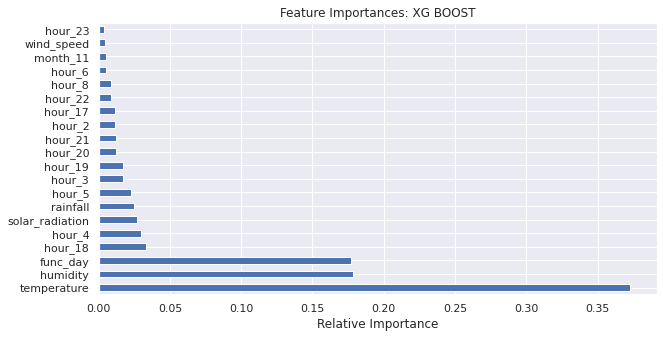

In [106]:
# Feature importances
xgb_feat_imp = pd.Series(xgb_regressor.best_estimator_.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: XG BOOST')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh')

**Temperature is the most important feature in predicting the value of the dependent variable using XG boost, followed by func_day and humidity.**

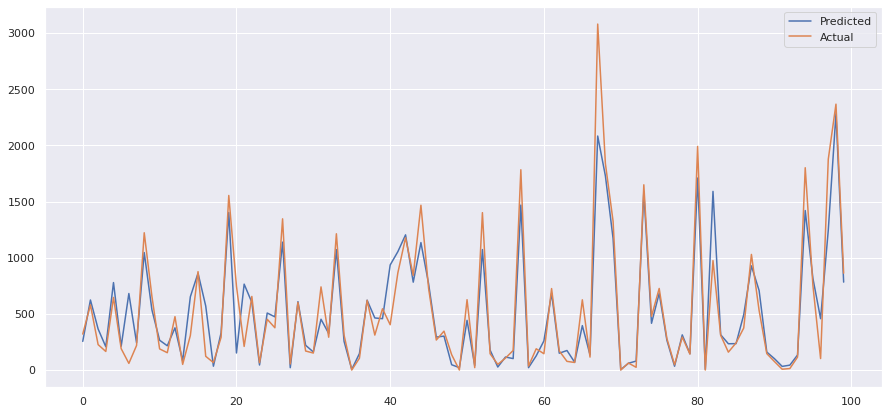

In [107]:
# Actual vs predicted values of dependent variables for 100 observation for better visualisation
plt.figure(figsize=(15,7))
plt.plot(np.square(xgb_y_test_pred[:100]))
plt.plot(np.square(np.array(y_test[:100])))
plt.legend(["Predicted","Actual"])
plt.show()

# **9. XG Boost model explainability using Shapley values:**

* We will use Shapley values  to explain the black box model(XG boost).
* It shows the contribution or the importance of each feature on the prediction of the model. This makes it more explainable.

In [108]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 5.3 MB/s 


In [109]:
# importing shap
import shap 

In [110]:
#Get shap values
explainer = shap.Explainer(xgb_regressor.best_estimator_)
shap_values = explainer(X_test)

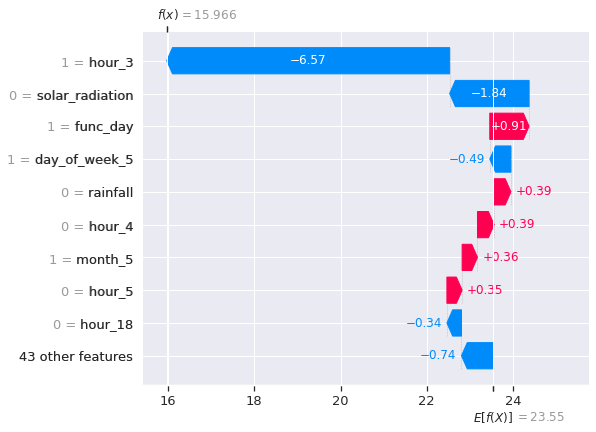

In [111]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

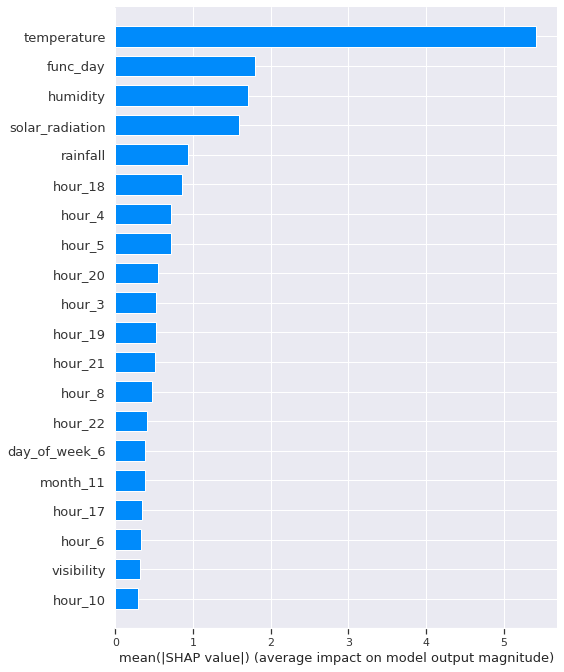

In [112]:
# Obtain a Bar Summary Plot
shap.summary_plot(shap_values, X_train, plot_type="bar")

**The above plot gives the average feature shapley values.**

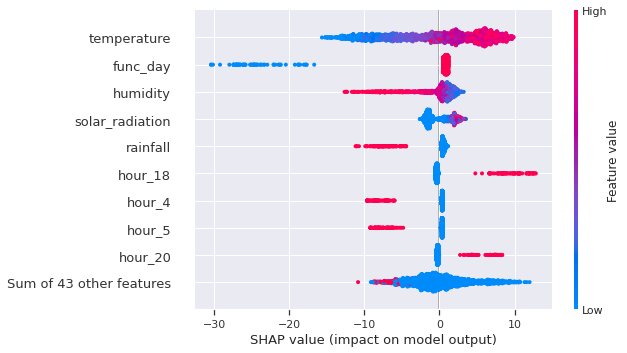

In [113]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

**The above plot is called bee swarm plot, which helps us understand the global importance / contribution of each feature.**

# **10. Results:**

In [114]:
# Summarizing the results obtained
test = PrettyTable(['Sl. No.','Regression Model', 'Train RMSE','Test RMSE','Train R2 Score (%)','Test R2 Score (%)'])
test.add_row(['1','Linear Regression',lr_train_RMSE,LR_test_RMSE,lr_train_r2*100,LR_test_r2*100])
test.add_row(['2','Lasso Regression',las_train_RMSE,las_test_RMSE,las_train_r2*100,las_test_r2*100])
test.add_row(['3','Ridge Regression',ridge_train_RMSE,ridge_test_RMSE,ridge_train_r2*100,ridge_test_r2*100])
test.add_row(['4','Decision Tree',dt_train_RMSE,dt_test_RMSE,dt_train_r2*100,dt_test_r2*100])
test.add_row(['5','Random Forest',rf_train_RMSE,rf_test_RMSE,rf_train_r2*100,rf_test_r2*100])
test.add_row(['6','Gradient Boosting',gb_train_RMSE,gb_test_RMSE,gb_train_r2*100,gb_test_r2*100])
test.add_row(['7','XG Boost',xgb_train_RMSE,xgb_test_RMSE,xgb_train_r2*100,xgb_test_r2*100])

print(test)

+---------+-------------------+--------------------+--------------------+--------------------+-------------------+
| Sl. No. |  Regression Model |     Train RMSE     |     Test RMSE      | Train R2 Score (%) | Test R2 Score (%) |
+---------+-------------------+--------------------+--------------------+--------------------+-------------------+
|    1    | Linear Regression | 336.6434731173121  | 339.60454792093066 | 72.70783075000146  | 72.44324388929424 |
|    2    |  Lasso Regression | 336.67583327272996 | 339.63459425861004 | 72.70258352938185  | 72.43836753394474 |
|    3    |  Ridge Regression | 336.96492040087674 | 339.88744944073846 | 72.65568548144334  | 72.39731343678014 |
|    4    |   Decision Tree   | 266.46990157342736 | 304.3139647514398  | 82.90008382688056  | 77.87288148896646 |
|    5    |   Random Forest   | 259.74801093895513 | 284.77425770169367 | 83.75191735133997  | 80.62317779572011 |
|    6    | Gradient Boosting | 203.24240118623138 | 234.15091762746536 | 90.052

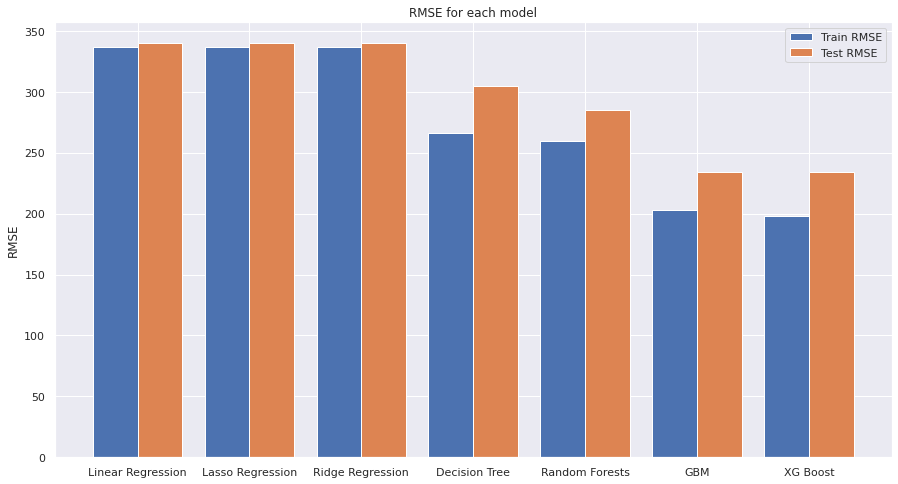

In [115]:
# Plotting RMSEs

ML_models = ['Linear Regression','Lasso Regression','Ridge Regression','Decision Tree','Random Forests','GBM','XG Boost']
train_rmses = [lr_train_RMSE,las_train_RMSE,ridge_train_RMSE,dt_train_RMSE,rf_train_RMSE,gb_train_RMSE,xgb_train_RMSE]
test_rmses = [LR_test_RMSE,las_test_RMSE,ridge_test_RMSE,dt_test_RMSE,rf_test_RMSE,gb_test_RMSE,xgb_test_RMSE]
  
X_axis = np.arange(len(ML_models))

plt.figure(figsize=(15,8))
plt.bar(X_axis - 0.2, train_rmses, 0.4, label = 'Train RMSE')
plt.bar(X_axis + 0.2, test_rmses, 0.4, label = 'Test RMSE')
  
plt.xticks(X_axis,ML_models)
plt.ylabel("RMSE")
plt.title("RMSE for each model")
plt.legend()
plt.show()

**The XG boost model was able to predict the dependent variable with the lowest test RMSE.**

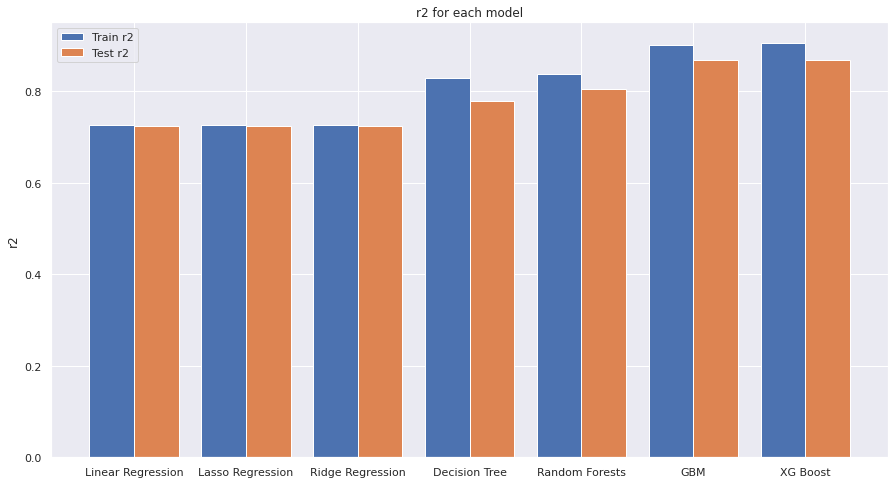

In [116]:
# Plotting R2 scores

ML_models = ['Linear Regression','Lasso Regression','Ridge Regression','Decision Tree','Random Forests','GBM','XG Boost']
train_r2 = [lr_train_r2,las_train_r2,ridge_train_r2,dt_train_r2,rf_train_r2,gb_train_r2,xgb_train_r2]
test_r2 = [LR_test_r2,las_test_r2,ridge_test_r2,dt_test_r2,rf_test_r2,gb_test_r2,xgb_test_r2]
  
X_axis = np.arange(len(ML_models))

plt.figure(figsize=(15,8))
plt.bar(X_axis - 0.2, train_r2, 0.4, label = 'Train r2')
plt.bar(X_axis + 0.2, test_r2, 0.4, label = 'Test r2')
  
plt.xticks(X_axis,ML_models)
plt.ylabel("r2")
plt.title("r2 for each model")
plt.legend()
plt.show()

**The XG boost model was able to predict the dependent variable with the highest test R2 score.**

# **11. Summary and conclusions:**

* We trained 7 unique Machine Learning models using the training dataset, and the its respective performance was improved through hyperparameter tuning.
* We initially started with the Linear Regression model, mainly because it is easily explainable to the stakeholders, and its low training time.
* Once we were successfully able to fit a decision tree, it was necessary to improve the prediction accuracy, and reduce errors in the predictions.
* To achieve this, we fit a random forest model on the training data, and the final predictions showed less errors compared to that of decision tree model.
* To further improve the predictions of the model, we fit 2 boosting models namely; Gradient boosting machine (GBM) and Extreme gradient boost (XG Boost). The predictions obtained from these models showed errors in the same range, but the errors were lower than that of decision tree model.

The XG Boost model has the lowest RMSE, and the highest R2 score.

Final choice of model depends on:
* If it is absolutely necessary to have a model with the best accuracy, then XG boost will be the best choice, since it has the lowest RMSE than other models built.
* But as we know, higher the model complexity, lower is the model explainability. Hence if the predictions must be explained to stakeholers, then XG Boost is not an ideal choice.
* In this case decision tree can be used, since they are easier to explain. By choosing a simpler model, we will be compromising with the model accuracy (Accuracy vs Interpretability tradeoff).

# **12. References:**

* GeekforGeeks 
* Analytics Vidhya
* Kaggle
* W3 school
* Pythonguides
* Stackoverflow

